<a href="https://colab.research.google.com/github/luizhsalazar/mestrado-no-show/blob/main/An%C3%A1lise_Dados_CER_Qualifica%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Carregamento do dataset, merge dos dados dos prontuários e rename de colunas

In [ ]:
import pandas as pd
import numpy as np

from datetime import date, datetime
from datetime import date

import seaborn as sns
import matplotlib.pyplot as plt

Removidos (agenda.csv):
* Coluna "num_prontuario" (merge com o prontuário do paciente:
  * 10 registros com num_prontuario com o nome do paciente
  * 9 registros com valores inválidos ou vazios. Exemplo: "12:10", "17/9/1902", "825/982", "639/592", "639/592")


In [ ]:
# path_agenda = '/content/drive/MyDrive/Mestrado/2022 - Dissertação/Qualificação/Dados CER - Ajustados/All/agenda-ajustado.csv'
#path_prontuarios = '/content/drive/MyDrive/Mestrado/Prontuarios CER Univali/prontuario-controle-usuarios.csv'
path_prontuarios = '/content/drive/MyDrive/Mestrado/2022 - Dissertação/Qualificação/Dados CER - Ajustados/usuarios/prontuario-controle-usuarios-v02.csv'
path_agenda_ajustada = '/content/drive/MyDrive/Mestrado/2022 - Dissertação/Qualificação/Dados CER - Ajustados/All/agenda-ajustado-v04-dados-cer-2019.csv'

prontuarios1 = pd.read_csv(path_agenda_ajustada)
prontuarios2 = pd.read_csv(path_prontuarios)

prontuarios = pd.merge(prontuarios1, prontuarios2, how='left', on=['num_prontuario'])

# Dados Brutos

In [ ]:
#prontuarios.to_csv('prontuarios.csv')

In [ ]:
prontuarios.head()

,num_prontuario,especialidade,horario,genero,data,compareceu,justificativa,DEF.,DATA DE NASCIMENTO,DATA ENTRADA no Serviço,PROCEDÊNCIA,CID,UBS
0,2123,Fisio,13:20,M,9/9/2021,Não,surto,NaN,NaN,NaN,NaN,NaN,NaN
1,2067,Psico,13:20,M,9/9/2021,Sim,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2012,fono,13:20,F,9/9/2021,Sim,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023,Fisio,13:20,F,9/9/2021,Sim,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1876,Fisio,14:00,M,9/9/2021,Sim,NaN,F,10/10/1954,5/2/2020,BALN.CAMBORIU,I 67,NAI - BC


In [ ]:
print('%d prontuários brutos para análise' % len(prontuarios))

49759 prontuários brutos para análise


In [ ]:
prontuarios.columns

Index(['num_prontuario', 'especialidade ', 'horario', 'genero', 'data',
       'compareceu', 'justificativa', 'DEF.', 'DATA DE NASCIMENTO',
       'DATA ENTRADA no Serviço', 'PROCEDÊNCIA', 'CID', 'UBS'],
      dtype='object')

In [ ]:
prontuarios.shape

(49759, 13)

In [ ]:
rename = {     
    'especialidade ': 'especialidade',
    'data': 'data_consulta',
    'DEF.' : 'deficiencia',
    'DATA DE NASCIMENTO' : 'data_nascimento',
    'DATA ENTRADA no Serviço' : 'data_entrada_servico',
    'PROCEDÊNCIA' : 'cidade_procedencia',
    'CID' : 'cid',
    'UBS' : 'ubs',
}
dados = prontuarios.rename(columns=rename)
dados.columns

Index(['num_prontuario', 'especialidade', 'horario', 'genero', 'data_consulta',
       'compareceu', 'justificativa', 'deficiencia', 'data_nascimento',
       'data_entrada_servico', 'cidade_procedencia', 'cid', 'ubs'],
      dtype='object')

# Data Wrangling

## Dados da agenda

### Dados faltantes SEM PRÉ-PROCESSAMENTO

In [ ]:
# Porcentagem dos valores faltantes por coluna 

for column in dados.columns:
    if dados[column].isnull().sum() > 0:
        print(column, ': {:.2%}'.format(dados[column].isnull().sum() /
                                               dados[column].shape[0]))

especialidade : 0.07%
horario : 0.03%
genero : 0.01%
compareceu : 0.10%
justificativa : 82.78%
deficiencia : 10.12%
data_nascimento : 20.26%
data_entrada_servico : 10.16%
cidade_procedencia : 10.18%
cid : 79.91%
ubs : 81.45%


### Coluna "Compareceu"

In [ ]:
dados.compareceu.value_counts()

Sim            41388
Não             4035
não informa     2110
Sim             1398
não              264
Não              204
sim              199
???               64
Nao               31
NÃO                9
SIm                6
N                  1
NAo                1
Name: compareceu, dtype: int64

In [ ]:
dados = dados[(dados.compareceu != 'não informa') & (dados.compareceu != '???')]
print(dados['compareceu'].value_counts()) 

Sim     41388
Não      4035
Sim      1398
não       264
Não       204
sim       199
Nao        31
NÃO         9
SIm         6
N           1
NAo         1
Name: compareceu, dtype: int64


In [ ]:
# Replace de dados incorretos coluna attended
dados.loc[dados['compareceu'].isin(['Não', 'Não ', 'não', 'NAo', 'Nao', 'N', 'NÃO']), 'compareceu'] = 'Não'
dados.loc[dados['compareceu'].isin(['Sim', 'Sim ', 'sim', 'SIm']), 'compareceu'] = 'Sim'

print(dados['compareceu'].value_counts())

Sim    42991
Não     4545
Name: compareceu, dtype: int64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
dados['compareceu'].unique()

array(['Não', 'Sim', nan], dtype=object)

In [ ]:
dados['compareceu'].isna().sum()

49

### Coluna "Gênero"

In [ ]:
dados.genero.value_counts()

M             32754
F             10767
m              2639
M               724
f               670
sem nome          5
Indefinido        4
N                 4
F                 4
         F        3
i                 2
"Orli"            2
I                 1
D                 1
Name: genero, dtype: int64

In [ ]:
dados['genero'].unique()

array(['M', 'F', 'f', 'm', 'sem nome', 'M ', 'Indefinido', 'i', nan, 'N',
       'I', 'F ', 'D', '         F', '"Orli"'], dtype=object)

In [ ]:
# Replace de dados incorretos coluna attended
dados.loc[dados['genero'].isin(['M', 'M ', 'm', 'NAo', 'Nao', 'N', 'NÃO']), 'genero'] = 'M'
dados.loc[dados['genero'].isin(['F', 'F ', 'f', '         F', '']), 'genero'] = 'F'
dados.loc[dados['genero'].isin(['Indefinido', 'i', 'I']), 'genero'] = 'I'

print(dados['genero'].value_counts())

M           36121
F           11444
I               7
sem nome        5
"Orli"          2
D               1
Name: genero, dtype: int64


In [ ]:
dados = dados[(dados.genero == 'M') | (dados.genero == 'F') | (dados.genero == 'I')]
print(dados['genero'].value_counts()) 

M    36121
F    11444
I        7
Name: genero, dtype: int64


In [ ]:
dados['genero'].isna().sum()

0

### Coluna "Especialidade"

Valores considerados:
* Psico- Psicologo
* Fono- Fonodiologo
* Nutri-Nutricionista
* TO-Terapia Ocupacional
* Pedago-Pedagogo
* Fisio- Fisioterapia
* Assist- Assistente Social

In [ ]:
dados['especialidade'] = dados['especialidade'].str.strip().str.lower()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
dados.especialidade.value_counts()

psico                      11426
fono                       11190
fisio                       8779
to                          6022
nutri                       1683
pedago                       996
pedagoga                     753
enf                          709
leticia                      701
raphaela                     652
t.o                          419
julia                        335
pedag                        317
fono 2                       277
tatiana                      205
poliana                      203
luís henrique                197
as                           182
fono 1                       182
andrea                       181
mayara                       175
tais                         172
lais                         171
pyetra                       160
cristiane                    157
marcia                       153
aline                        133
jessica                      100
psico 1                       92
psico 2                       70
fisio 2   

In [ ]:
dados.loc[dados['especialidade'].isin(['psico', 'pisco', '`psico', 'pscio', 'psico 2', 'psico 1']), 'especialidade'] = 'psico'
dados.loc[dados['especialidade'].isin(['fono', 'f', 'fono1', 'fono2', 'fono 1', 'fono 2']), 'especialidade'] = 'fono'
dados.loc[dados['especialidade'].isin(['assist', 'a.s', 'as']), 'especialidade'] = 'assist'
dados.loc[dados['especialidade'].isin(['fisio', 'fisio 1', 'fisio 2', 'fiso']), 'especialidade'] = 'fisio'
dados.loc[dados['especialidade'].isin(['to', 't.o.', 't.o']), 'especialidade'] = 'terap_ocupacional'
dados.loc[dados['especialidade'].isin(['pedago', 'pedagoga', 'pedag']), 'especialidade'] = 'pedagogo'

#### Conversão do nome do especialista para o label **"especialista"**

Solicitar para o Rafael o mapeamento do nome do especialista -> especialidade

In [ ]:
dados.loc[~dados['especialidade'].isin(['psico', 'fono', 'assist', 'fisio', 'terap_ocupacional', 'pedagogo', 'sem especialidade', 'enf']), 'especialidade'] = 'especialista'

In [ ]:
dados['especialidade'].unique()

array(['fisio', 'psico', 'fono', 'terap_ocupacional', 'especialista',
       'enf', 'assist', 'pedagogo', 'sem especialidade'], dtype=object)

In [ ]:
dados['especialidade'].value_counts()

fono                 11653
psico                11591
fisio                 8894
terap_ocupacional     6441
especialista          5967
pedagogo              2066
enf                    709
assist                 194
sem especialidade       57
Name: especialidade, dtype: int64

In [ ]:
dados['especialidade'].isna().sum()

0

### Coluna "Data da Consulta"

* Criação da coluna **mês** e **ano** da consulta
* Criação da coluna **idade**

In [ ]:
def convert_data_zero_esquerda(data):
  try:
    data_original = datetime.strptime(data, '%d/%m/%Y').date()
    data_formatada = data_original.strftime('%d/%m/%Y')
    return data_formatada
  except ValueError:  
    print(data)
    raise ValueError("Incorrect data format, should be YYYY-MM-DD")

dados['data_consulta'] = dados.data_consulta.apply(convert_data_zero_esquerda)

#### Criação da coluna de **mês e ano** da consulta


In [ ]:
from datetime import datetime
from datetime import date
import numpy as np

MONTHS = {1: 'jan', 2: 'fev', 3: 'mar', 4: 'abr', 5: 'maio', 6: 'jun',
          7: 'jul', 8: 'ago', 9: 'set', 10: 'out', 11: 'nov', 12: 'dez'}

def extrai_appointment_month(data):
    try:
      data = datetime.strptime(data, "%d/%m/%Y").date()
      return MONTHS[data.month]
    except ValueError as err:
      print('Data com formato inválido: ' + data)
      pass

dados['mes_consulta'] = dados['data_consulta'].apply(extrai_appointment_month)

In [ ]:
def extrai_appointment_year(data):
    try:
      data = datetime.strptime(data, "%d/%m/%Y").date()
      return data.year
    except ValueError as err:
      print('Data com formato inválido: ' + data)
      pass

dados['ano_consulta'] = dados['data_consulta'].apply(extrai_appointment_year)

In [ ]:
dados.ano_consulta.value_counts()

2017    12591
2018     9606
2019     8584
2016     8007
2021     6917
2022      963
2020      904
Name: ano_consulta, dtype: int64

#### Plot dos dados

Primeiro, salientar no texto que os plots foram gerados para validar que o montante de dados digitalizados (incluídos nas planilhas) está de acordo com o esperado pelo especialista da CER (Prof. Rafael). Ou seja, objetivo da visualização por ano foi validar que faz sentido com os dados da clínica.


Salientar aqui que o ano de 2022 foi removido para analisar os dados posteriormente. Os dados de 2020 também será reanalisados para validar possíveis erros de digitação.

##### Remoção dados de 2022 e groupby mês/ano para os plots

In [ ]:
dados_ate_2021 = dados[pd.to_datetime(dados['data_consulta']).dt.year != 2022]

In [ ]:
df = dados_ate_2021
dados_data_consulta_por_mes_ano = df['data_consulta'].groupby([pd.to_datetime(df['data_consulta']).dt.year.rename('ano'), pd.to_datetime(df['data_consulta']).dt.month.rename('mês')]).agg({'count'})

##### **(Não utilizado no relatório)** Teste de plot com os meses e não via número do mês -> jan: 1, fev: 2, etc

In [ ]:
#df = dados_ate_2021
#teste = df['data_consulta'].groupby([df['ano_consulta'], df['mes_consulta']]).agg({'count'})

In [ ]:
#import seaborn as sns
#sns.set_theme(style="darkgrid")
#plt.figure(figsize=(12,10))

#sns.lineplot(x="mes_consulta", y="count", hue="ano_consulta", palette='crest',
#             data=teste,
#             marker='o')

##### Plots

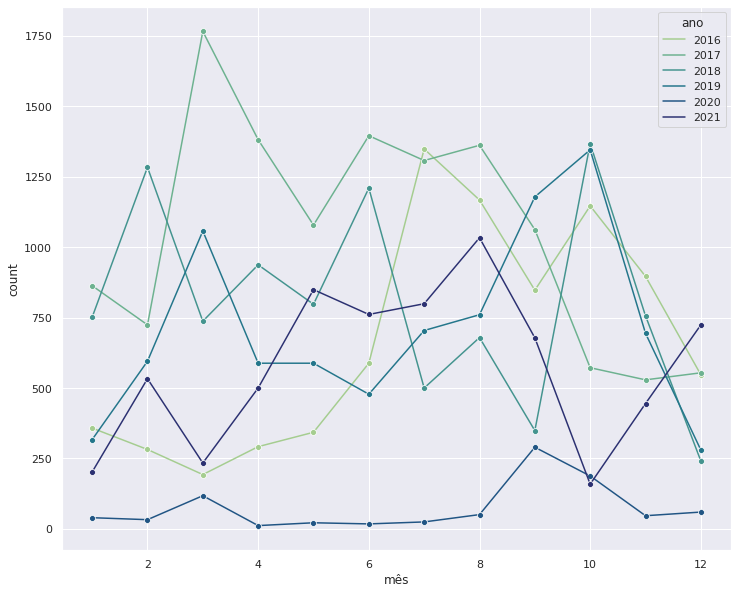

In [ ]:
import seaborn as sns
sns.set_theme(style="darkgrid")
plt.figure(figsize=(12,10))

sns.lineplot(x="mês", y="count", hue="ano", palette='crest',
             data=dados_data_consulta_por_mes_ano,
             marker='o')

<Figure size 1440x1296 with 0 Axes>

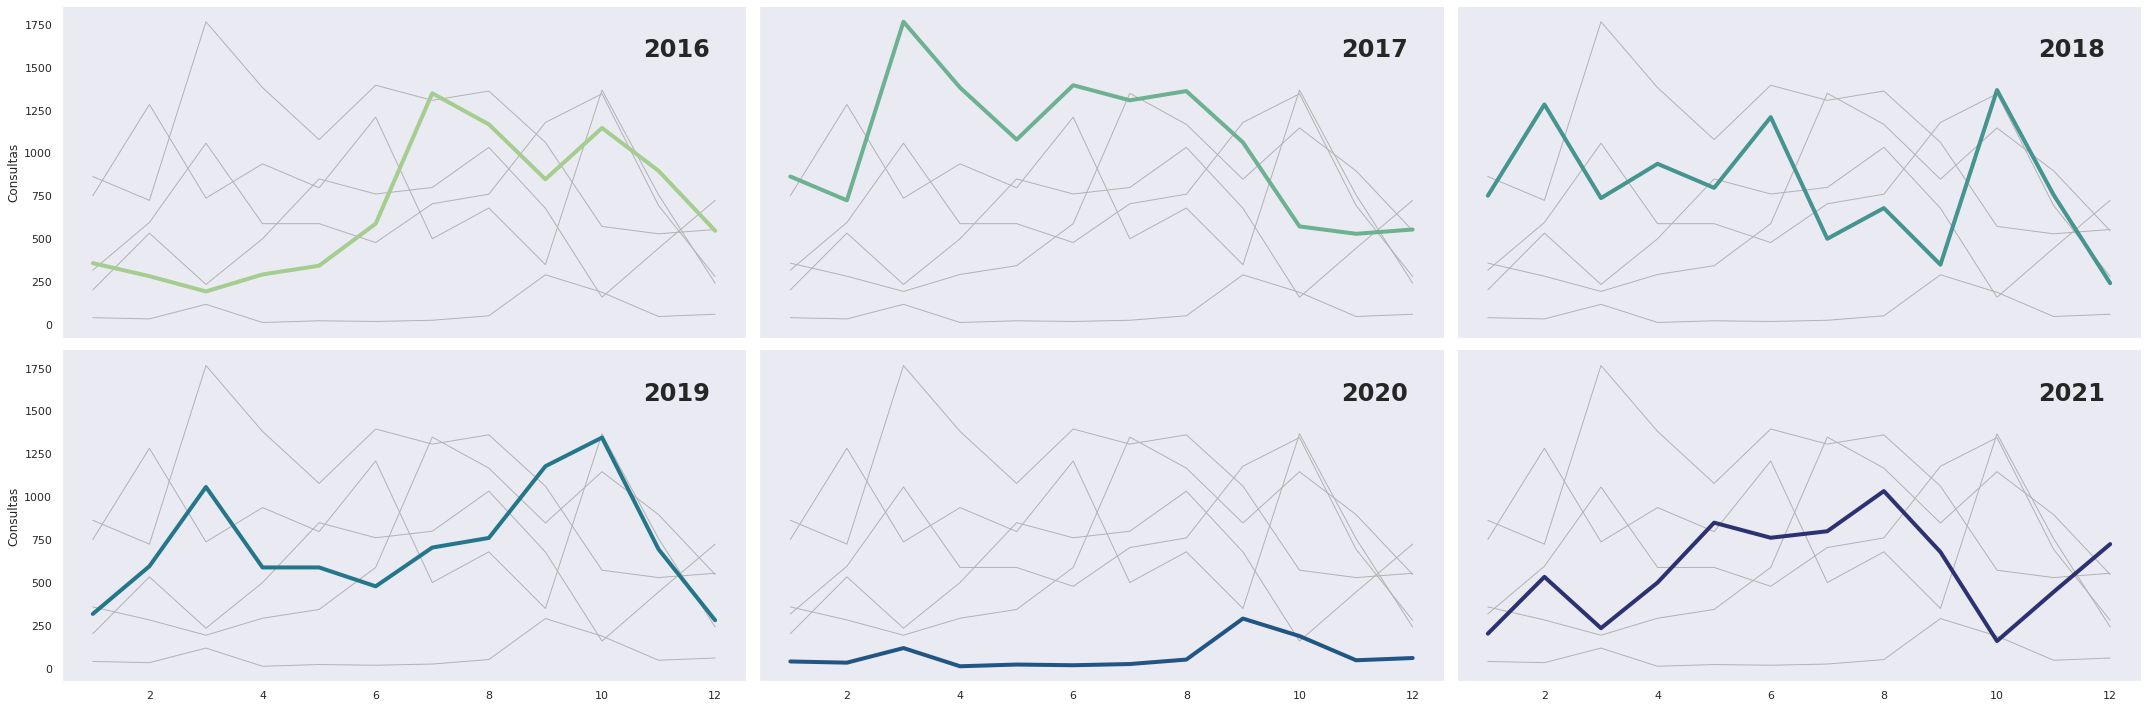

In [ ]:
import seaborn as sns

plt.figure(figsize=(20,18))

sns.set_theme(style="dark")
flights = dados_data_consulta_por_mes_ano

# Plot each year's time series in its own facet
# O "height" basicamente irá alterar a altura do seu gráfico e o "aspect" a largura.
g = sns.relplot(
    data=flights,
    x="mês", y="count", col="ano", hue="ano",
    kind="line", palette="crest", linewidth=4, zorder=5,
    col_wrap=3, height=5, aspect=2, legend=False,
)

# Iterate over each subplot to customize further
for year, ax in g.axes_dict.items():

    # Add the title as an annotation within the plot
    ax.text(.85, .85, year, transform=ax.transAxes, fontweight="bold", fontsize=24)

    # Plot every year's time series in the background
    sns.lineplot(
        data=flights, x="mês", y="count", units="ano",
        estimator=None, color=".7", linewidth=1, ax=ax,
    )

# Reduce the frequency of the x axis ticks
#ax.set_xticks(ax.get_xticks()[::2])

# Tweak the supporting aspects of the plot
g.set_titles("")
g.set_axis_labels("", "Consultas")
g.tight_layout()

In [ ]:
dados['data_consulta'].isna().sum()

0

### Coluna "Horário"

In [ ]:
dados['horario'] = dados['horario'].str.strip()

In [ ]:
dados.horario.unique()

array(['13:20', '14:00', '14:40', '15:20', '16:20', '17:00', '17:40',
       '08:00', '08:50', '09:40', '10:50', '11:40', '07:00', '08:40',
       '09:30', '10:20', '13:00', '16:35', '13:50', '15:30', '18:15',
       '17:25', '14:50', '15:40', '17:20', '08:20', '09:10', '10:30',
       '11:20', '07:30', '07:20', '09:20', '11:00', '18:00', '07:50',
       '12:20', '16:30', '11:10', '12:00', '13:30', '16:00', '08:30',
       '13:15', '15:50', '09:45', '10:35', '10:00', '09:50', '13:05',
       '12:10', '09:00', '11:30', '13:10', '13:40', '16:15', '15:10',
       '17:10', '14:20', '16:40', '14:30', '15:15', '10:10', nan, '08:10',
       '10:40', '16:36', '17:36', '15:00', '17:15', '14:10', '16:10',
       '17:35', '16:50', '09:03', '18:20'], dtype=object)

In [ ]:
dados['horario'].isna().sum()

17

#### Criação da coluna de "turno" (com base no horário)

In [ ]:
# Inclusão de "h" ao invés do ":" no horário 
# ----- Não é usado para nada até o momento

#dados['horario_com_h'] = dados['horario'].replace(':','h', regex=True)
#dados.horario_com_h.unique()

##### Conversão de horário para datetime para extração da hora e popular a coluna de turno da consulta

In [ ]:
 # Converte horário para datetime
dados['horario_dt'] = pd.to_datetime(dados['horario'])

In [ ]:
# Cria turno com base no horário da consulta
def create_turno(appointment_time):
  return 'Manhã' if appointment_time.hour <= 12 else 'Tarde'
  
dados['turno_consulta'] = dados.horario_dt.apply(create_turno)

In [ ]:
dados.groupby('turno_consulta', axis=0)[['horario', 'turno_consulta']].head()

,horario,turno_consulta
0,13:20,Tarde
1,13:20,Tarde
2,13:20,Tarde
3,13:20,Tarde
4,14:00,Tarde
92,08:00,Manhã
93,08:50,Manhã
94,09:40,Manhã
95,08:00,Manhã
96,08:00,Manhã


### Coluna "Justificativa"

In [ ]:
dados.justificativa.value_counts()

In [ ]:
dados['justificativa'] = dados['justificativa'].str.strip().str.lower()

In [ ]:
print("Total de registros COM JUSTIFICATIVA de não comparecimento (sem ajustes): %d" % dados.justificativa.notna().sum())
print("Valores únicos de justificativa (sem ajustes): %d" % dados.justificativa.nunique())

Total de registros COM JUSTIFICATIVA de não comparecimento (sem ajustes): 8467
Valores únicos de justificativa (sem ajustes): 348


In [ ]:
# Valores anulados pois não fazem sentido
# “não” (4430), “não justificada” (847), “sim” (380), “ok” (298), “falta justificada” (258),
# “sem justificativa” (247), “não justificou” (50), “justificou” (38), “em branco” (26),
# “avisado” (13), “nao justificou” (9), “ok pts” (6), “sem justificariva” (6), “s/ justificativa” (6),
# “justificada” (5), “ok cancelar” (4), “cancelado” (3), “n” (3), “ilegível” (2), “ok vó” (2), “??” (1),
# “não justi:” (1), “f” (1), “ok ligar vô” (1)
anulaveis = ['não', 'não justificada', 'sim', 'ok', 'falta justificada', 'sem justificativa', 'não justificou',
             'justificou', 'em branco', 'avisado', 'nao justificou', 'ok pts', 'sem justificariva', 's/ justificativa',
             'justificada', 'ok cancelar', 'cancelado', 'n', 'ilegível', 'ok vó', '??', 'não justi:', 'f', 'ok ligar vô', 'caixa postal']

dados.loc[dados['justificativa'].isin(anulaveis), 'justificativa'] = np.NaN

In [ ]:
print("Total de registros COM JUSTIFICATIVA de não comparecimento (com ajustes): %d" % dados.justificativa.notna().sum())
print("Valores únicos de justificativa (com ajustes): %d" % dados.justificativa.nunique())

Total de registros COM JUSTIFICATIVA de não comparecimento (com ajustes): 1744
Valores únicos de justificativa (com ajustes): 323


##### Total de justificativas por turno

In [ ]:
dados[dados['justificativa'].notna()].groupby(['turno_consulta']).agg('count')['num_prontuario']

turno_consulta
Manhã    3383
Tarde    5084
Name: num_prontuario, dtype: int64

In [ ]:
dados[dados['justificativa'].notna()].groupby(['turno_consulta', 'justificativa']).agg('count')['num_prontuario']

turno_consulta  justificativa           
Manhã                                       75
                 Gripe                       1
                 Não justificada             1
                 Preso Transito              1
                 Profissional de férias      3
                                            ..
Tarde           virose                       2
                vômito                       2
                “Não poderá vir”             2
                “Não vem C”                  1
                “Não vem escomes:”           1
Name: num_prontuario, Length: 490, dtype: int64

### Dados faltantes (nulos) após processamento

In [ ]:
# Porcentagem dos valores faltantes por coluna 

for column in dados.columns:
    if dados[column].isnull().sum() > 0:
        print(column, ': {:.2%}'.format(dados[column].isnull().sum() /
                                               dados[column].shape[0]))

horario : 0.04%
compareceu : 0.10%
justificativa : 82.20%
deficiencia : 9.91%
data_nascimento : 20.47%
data_entrada_servico : 9.95%
cidade_procedencia : 9.98%
cid : 79.99%
ubs : 81.48%
horario_dt : 0.04%


## Dados de controle de usuários

### Criação da coluna de **idade**

In [ ]:
dados.columns

Index(['num_prontuario', 'especialidade', 'horario', 'genero', 'data_consulta',
       'compareceu', 'justificativa', 'deficiencia', 'data_nascimento',
       'data_entrada_servico', 'cidade_procedencia', 'cid', 'ubs',
       'mes_consulta', 'ano_consulta', 'horario_dt', 'turno_consulta'],
      dtype='object')

In [ ]:
def calcula_idade(date_of_birth):
    if (pd.isnull(date_of_birth) or date_of_birth == '' or date_of_birth == ' '): return -1

    try:
      data = datetime.strptime(date_of_birth, "%d/%m/%Y").date()
      today = date.today()
      return today.year - data.year - ((today.month, today.day) < (data.month, data.day))
    except ValueError as err:
      print('Erro ao converter a data: ' + date_of_birth)
      pass

dados['idade'] = dados['data_nascimento'].apply(calcula_idade)

In [ ]:
print("Total de registros (não pacientes) com idade incluída: %d" % len(dados[dados['idade'] > 0]))
print("Total de registros (não pacientes) com idade faltante: %d" % len(dados[dados['idade'] == -1]))

Total de registros (não pacientes) com idade incluída: 37829
Total de registros (não pacientes) com idade faltante: 9743
